In [1]:
!pip install tensorflow-datasets

  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/62/82/521e36235c7890b067415fa874f5074ff21f1005a189d79fd72b33b39ca1/tensorflow_datasets-4.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for array-record from https://files.pythonhosted.org/packages/8f/d7/c561a3ee49d837478a78639502e8f21f52879d8d56b74fed3e30275836ea/array_record-0.4.0-py38-none-any.whl.metadata
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     ----------- ------------------------- 30.7/101.4 kB 660.6 kB/s eta 0:00:01
     ----------------------------------- --- 92.2/101.4 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 101.4/101.4 kB 980.3 kB/s eta 0:00:00
  Obtaining dependency information for etils[enp,epath]>=0.9.0 from https://files.pythonhosted.org/packages/ca/db/47ffb866d7a1aa21132a72f67e84c4f03a4cad11ae9d069dd61c52f929de/etils-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.


In [25]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/96/b1/f89962836d9a00dba0dc1336d8c2d4c8c8375db9884d329b35f00f483144/wordcloud-1.9.3-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.7 kB ? eta -:--:--
   ---------------------------------------- 300.7/300.7 kB 9.1 MB/s eta 0:00:00


In [32]:
import pandas as pd
import tensorflow as tf
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
import tensorflow_datasets as tfds

# Load the imdb_reviews dataset
imdb_reviews, info = tfds.load('imdb_reviews', with_info=True)

# Print information about the dataset
print(info)


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\91951\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num

In [4]:
reviews = []
labels = []

for example in imdb_reviews['train']:
    review_text = example['text'].numpy().decode('utf-8')
    review_label = example['label'].numpy()
    reviews.append(review_text)
    labels.append(review_label)

df = pd.DataFrame({'review': reviews, 'label': labels})

# Print the first 10 reviews and labels
print()

In [5]:
df.shape

(25000, 2)

In [6]:
df.head()

review  label
0  This was an absolutely terrible movie. Don't b...      0
1  I have been known to fall asleep during films,...      0
2  Mann photographs the Alberta Rocky Mountains i...      0
3  This is the kind of film for a snowy Sunday af...      1
4  As others have mentioned, all the women that g...      1

In [7]:
for i in df[:4]['review']:
    print(i)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [8]:
df.head()

review  label
0  This was an absolutely terrible movie. Don't b...      0
1  I have been known to fall asleep during films,...      0
2  Mann photographs the Alberta Rocky Mountains i...      0
3  This is the kind of film for a snowy Sunday af...      1
4  As others have mentioned, all the women that g...      1

In [9]:
df['label']=df['label'].replace({0: 'negative', 1: 'positive'})

In [10]:
def count_word(text):
    word=word_tokenize(text)
    word_count=len(word)
    return word_count

In [11]:
df['word_count']=df['review'].apply(count_word)

In [12]:
df.head()

review     label  word_count
0  This was an absolutely terrible movie. Don't b...  negative         132
1  I have been known to fall asleep during films,...  negative         125
2  Mann photographs the Alberta Rocky Mountains i...  negative         164
3  This is the kind of film for a snowy Sunday af...  positive          96
4  As others have mentioned, all the women that g...  positive          94

In [13]:
stop_words=stopwords.words('english')

In [14]:
def text_pre_process(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_token=word_tokenize(text)
    filtered_text=[w for w in text_token if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df['review']=df['review'].apply(text_pre_process)

In [18]:
df['word_count']=df['review'].apply(count_word)

In [19]:
df.head()

review     label  word_count
0  absolutely terrible movie dont lured christoph...  negative          66
1  known fall asleep films usually due combinatio...  negative          52
2  mann photographs alberta rocky mountains super...  negative          71
3  kind film snowy sunday afternoon rest world go...  positive          45
4  others mentioned women go nude film mostly abs...  positive          39

In [20]:
lemm=WordNetLemmatizer()
def lemma(data):
    lemmatize_word=[lemm.lemmatize(token) for token in word_tokenize(data)]
    return " ".join(lemmatize_word)
    

In [21]:
df['review']=df['review'].apply(lemma)

In [22]:
df['word_count']=df['review'].apply(count_word)

In [23]:
df.head()

review     label  word_count
0  absolutely terrible movie dont lured christoph...  negative          66
1  known fall asleep film usually due combination...  negative          52
2  mann photograph alberta rocky mountain superb ...  negative          71
3  kind film snowy sunday afternoon rest world go...  positive          45
4  others mentioned woman go nude film mostly abs...  positive          39

In [33]:
def word_cloud(data):
    text=" ".join([word for word in data['review']])
    plt.figure(figsize=(20,15),facecolor='None')
    word_cloud=WordCloud(max_words=500, width=1600 , height=800).generate(text)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')

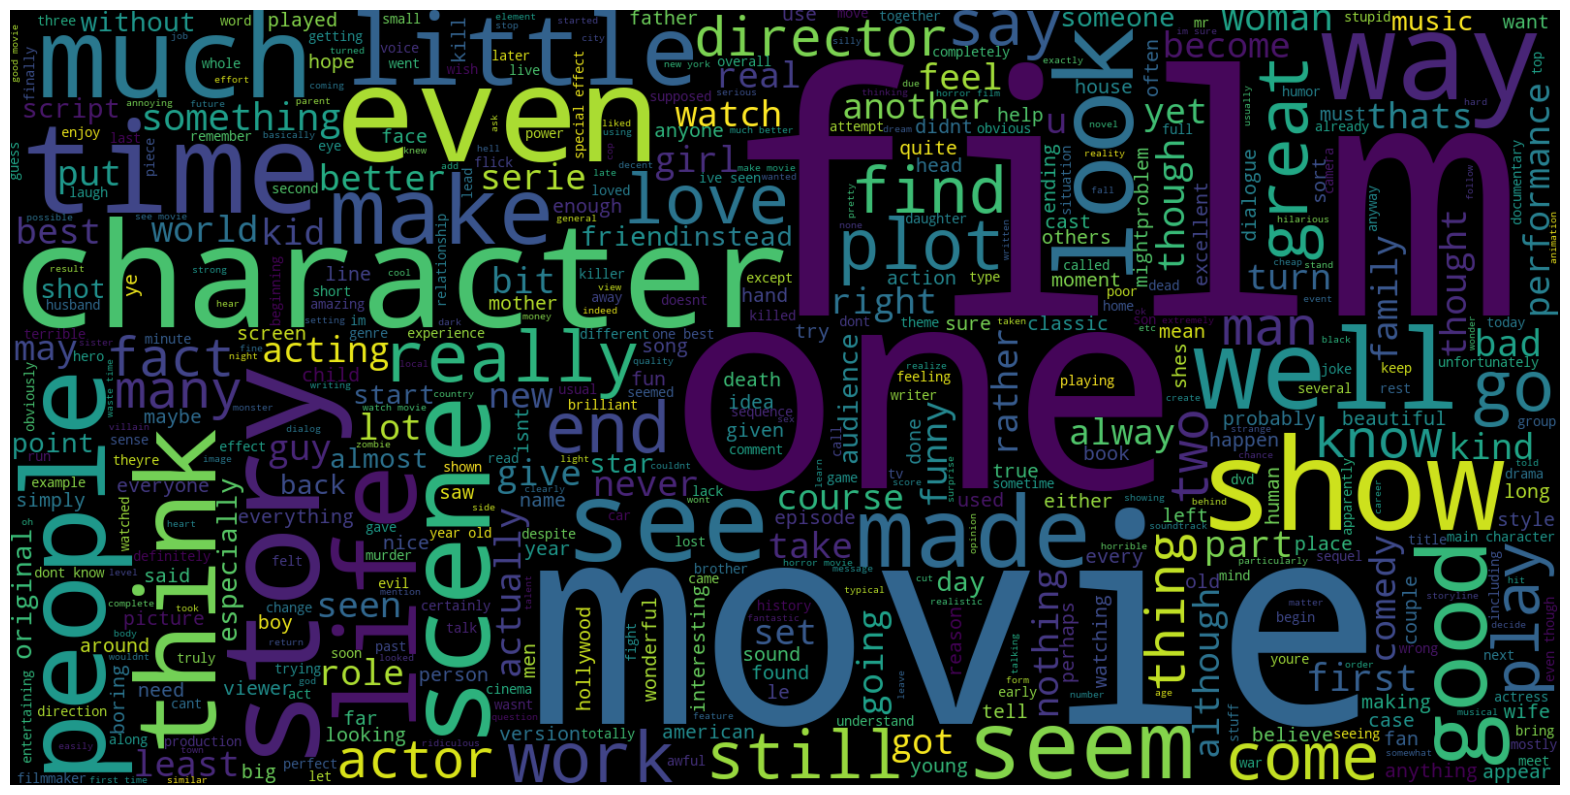

In [34]:
word_cloud(df)

In [39]:
pos=df[df['label']=='positive']
pos.head()

review     label  word_count
3   kind film snowy sunday afternoon rest world go...  positive          45
4   others mentioned woman go nude film mostly abs...  positive          39
5   film seen anybody interested effected sufferin...  positive         144
11  cute film three lively sister switzerland ofte...  positive         164
12  1984 version dickens classic christmas carol d...  positive         289

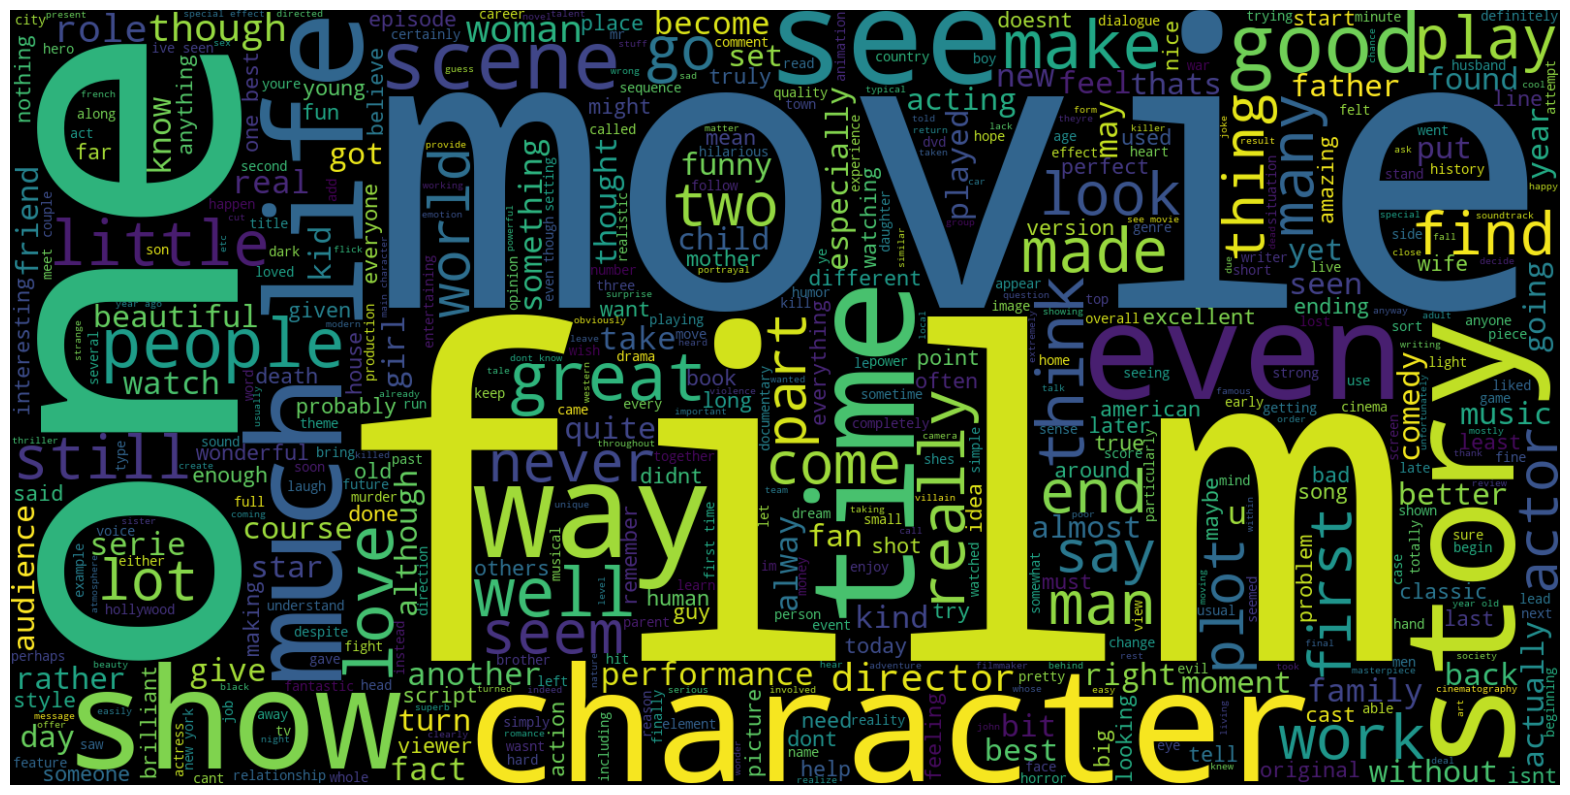

In [40]:
word_cloud(pos)

In [41]:
neg=df[df['label']=='negative']
neg.head()

review     label  word_count
0  absolutely terrible movie dont lured christoph...  negative          66
1  known fall asleep film usually due combination...  negative          52
2  mann photograph alberta rocky mountain superb ...  negative          71
6  okay havepenelope keith miss herringbonetweed ...  negative         290
7  film based genuine 1950s noveljournalist colin...  negative          61

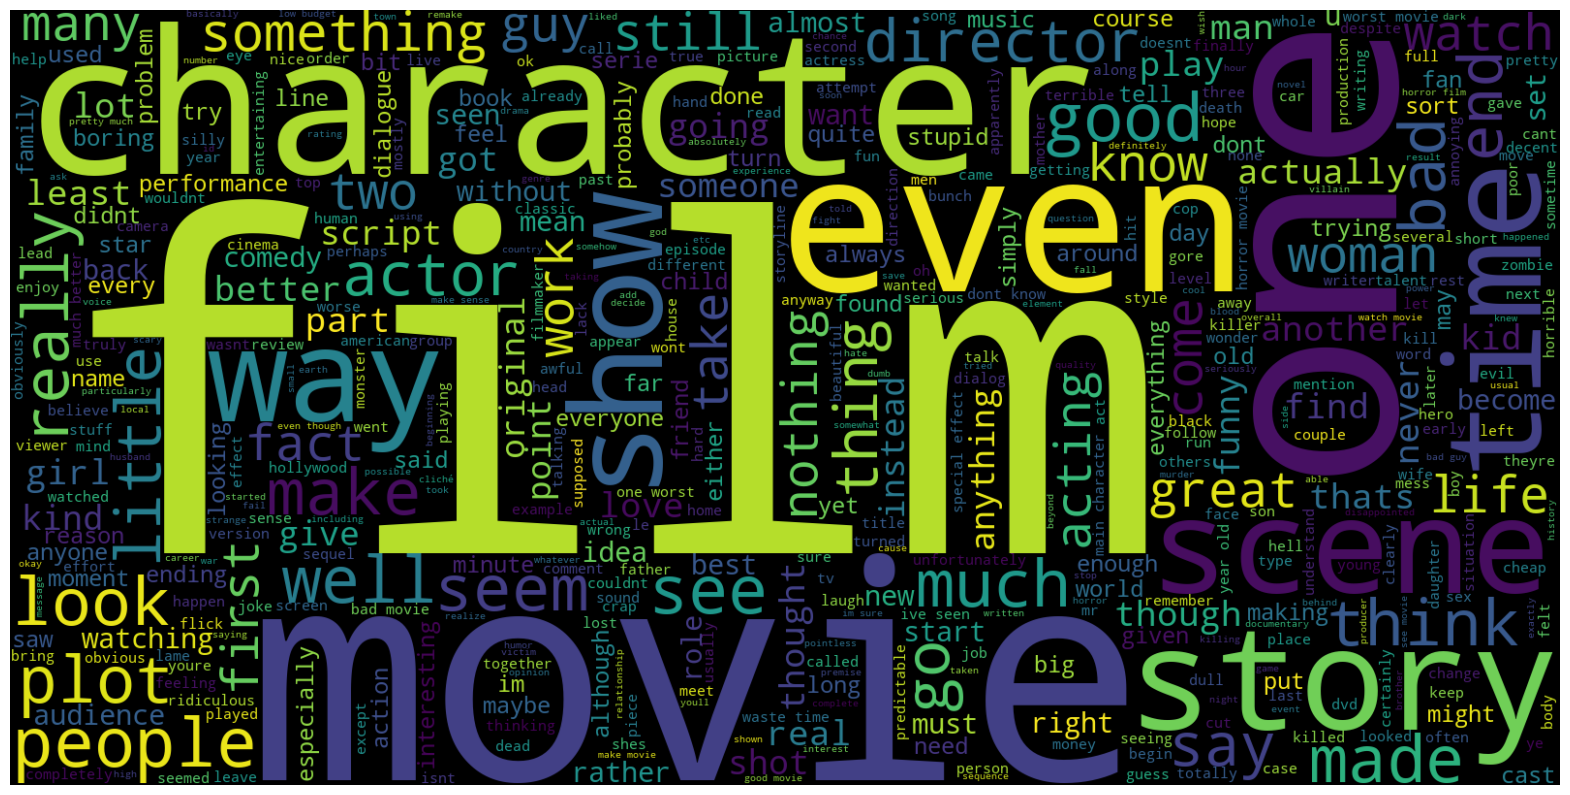

In [42]:
word_cloud(neg)

## Bag of word

In [79]:
all_rev=[]
pos_rev=[]
neg_rev=[]

In [81]:
for index,row in df.iterrows():
    temp_rev=row['review_pre']
    all_rev.append(temp_rev)
    if row['label']==0:
        neg_rev.append(temp_rev)
    else:
        pos_rev.append(temp_rev)

In [142]:
lemmatization=WordNetLemmatizer()

def text_pre_preocessing(text):
    
    tokens=word_tokenize(text) # convert the sentences into token
    tokens_without_punct = [token for token in tokens if token not in string.punctuation]
    token_without_stop=[word for word in tokens_without_punct if word.lower() not in stopwords.words('english')] # removing the stop words

    
    
    #lemmatization
    
    lem_token=[lemmatization.lemmatize(token) for token in token_without_stop] # getting the real meaning word
    
    return lem_token

In [89]:
# all_rev

In [91]:
vector=vectorizer.fit_transform(all_rev)

AttributeError: 'list' object has no attribute 'lower'

In [92]:
pos_rev

[['kind',
  'film',
  'snowy',
  'Sunday',
  'afternoon',
  'rest',
  'world',
  'go',
  'ahead',
  'business',
  'descend',
  'big',
  'arm-chair',
  'mellow',
  'couple',
  'hour',
  '.',
  'Wonderful',
  'performance',
  'Cher',
  'Nicolas',
  'Cage',
  '(',
  'always',
  ')',
  'gently',
  'row',
  'plot',
  'along',
  '.',
  'rapid',
  'cross',
  ',',
  'dangerous',
  'water',
  ',',
  'warm',
  'witty',
  'paddle',
  'New',
  'York',
  'life',
  'best',
  '.',
  'family',
  'film',
  'every',
  'sense',
  'one',
  'deserves',
  'praise',
  'received',
  '.'],
 ['others',
  'mentioned',
  ',',
  'woman',
  'go',
  'nude',
  'film',
  'mostly',
  'absolutely',
  'gorgeous',
  '.',
  'plot',
  'ably',
  'show',
  'hypocrisy',
  'female',
  'libido',
  '.',
  'men',
  'around',
  'want',
  'pursued',
  ',',
  '``',
  'men',
  "''",
  'around',
  ',',
  'become',
  'pursuer',
  '14',
  'year',
  'old',
  'boy',
  '.',
  'boy',
  'becomes',
  'man',
  'really',
  'fast',
  '(',
  'luck

In [110]:
pos_ne=[]
for i in pos_rev:
    for j in i:
        pos_ne.append(j)

In [111]:
pos_ne

['kind',
 'film',
 'snowy',
 'Sunday',
 'afternoon',
 'rest',
 'world',
 'go',
 'ahead',
 'business',
 'descend',
 'big',
 'arm-chair',
 'mellow',
 'couple',
 'hour',
 '.',
 'Wonderful',
 'performance',
 'Cher',
 'Nicolas',
 'Cage',
 '(',
 'always',
 ')',
 'gently',
 'row',
 'plot',
 'along',
 '.',
 'rapid',
 'cross',
 ',',
 'dangerous',
 'water',
 ',',
 'warm',
 'witty',
 'paddle',
 'New',
 'York',
 'life',
 'best',
 '.',
 'family',
 'film',
 'every',
 'sense',
 'one',
 'deserves',
 'praise',
 'received',
 '.',
 'others',
 'mentioned',
 ',',
 'woman',
 'go',
 'nude',
 'film',
 'mostly',
 'absolutely',
 'gorgeous',
 '.',
 'plot',
 'ably',
 'show',
 'hypocrisy',
 'female',
 'libido',
 '.',
 'men',
 'around',
 'want',
 'pursued',
 ',',
 '``',
 'men',
 "''",
 'around',
 ',',
 'become',
 'pursuer',
 '14',
 'year',
 'old',
 'boy',
 '.',
 'boy',
 'becomes',
 'man',
 'really',
 'fast',
 '(',
 'lucky',
 'age',
 '!',
 ')',
 '.',
 'get',
 'courage',
 'pursue',
 'true',
 'love',
 '.',
 'film',
 '

In [114]:
new=vectorizer.fit_transform(pos_ne)

In [115]:
bow_dict_positive = dict(zip(vectorizer.get_feature_names_out(), new.toarray().sum(axis=0)))

MemoryError: Unable to allocate 842. GiB for an array with shape (2159802, 52310) and data type int64

In [133]:
new

<2159802x52310 sparse matrix of type '<class 'numpy.int64'>'
	with 1598951 stored elements in Compressed Sparse Row format>